In [5]:
import pandas as pd

df = pd.read_excel('Classical ML Results with Metrics.xlsx')

df

,Dataset,Model,Satellite,MAE,MSE,RMSE,MAPE,R2
0,VV+VH+Angle,RandomForest,Sentinel,9.235246,123.755040,11.124524,0.538870,-0.124193
1,VV+VH+Angle,XGBoost,Sentinel,9.162773,121.797632,11.036196,0.535619,-0.106412
2,VV+VH+Angle,AdaBoost,Sentinel,9.003120,117.080659,10.820382,0.529067,-0.063563
3,VV+VH+Angle,SVR,Sentinel,8.961579,121.135467,11.006156,0.538779,-0.100397
4,VV+VH,RandomForest,Sentinel,9.123087,125.177684,11.188283,0.540568,-0.137117
5,VV+VH,XGBoost,Sentinel,8.913458,118.515219,10.886470,0.534035,-0.076595
6,VV+VH,AdaBoost,Sentinel,9.205691,126.838504,11.262260,0.539133,-0.152204
7,VV+VH,SVR,Sentinel,8.804420,114.389613,10.695308,0.529388,-0.039118
8,VV+VH+Angle+Day+Month+Year,RandomForest,Sentinel,9.573189,130.233812,11.412003,0.584149,-0.183047
9,VV+VH+Angle+Day+Month+Year,XGBoost,Sentinel,9.149114,120.265944,10.966583,0.560447,-0.092498


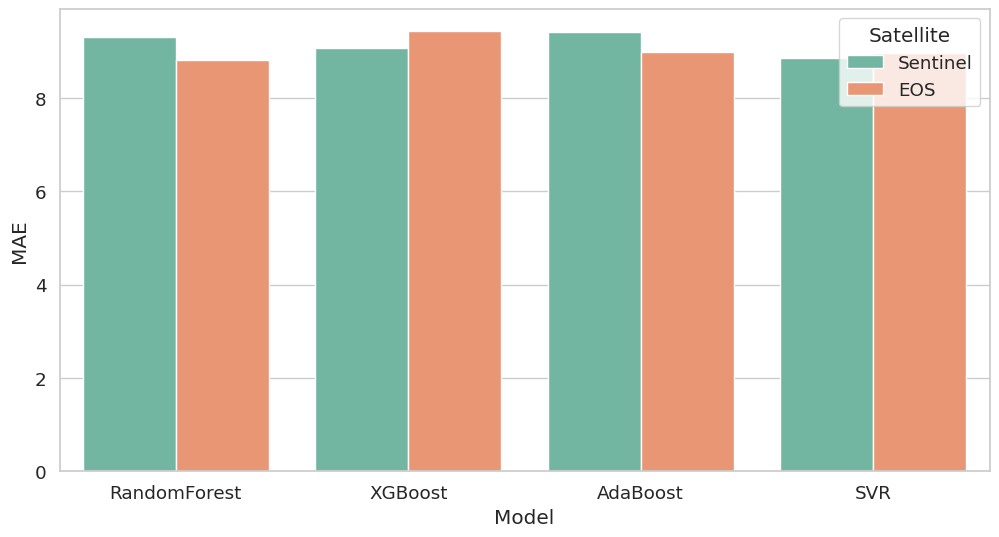

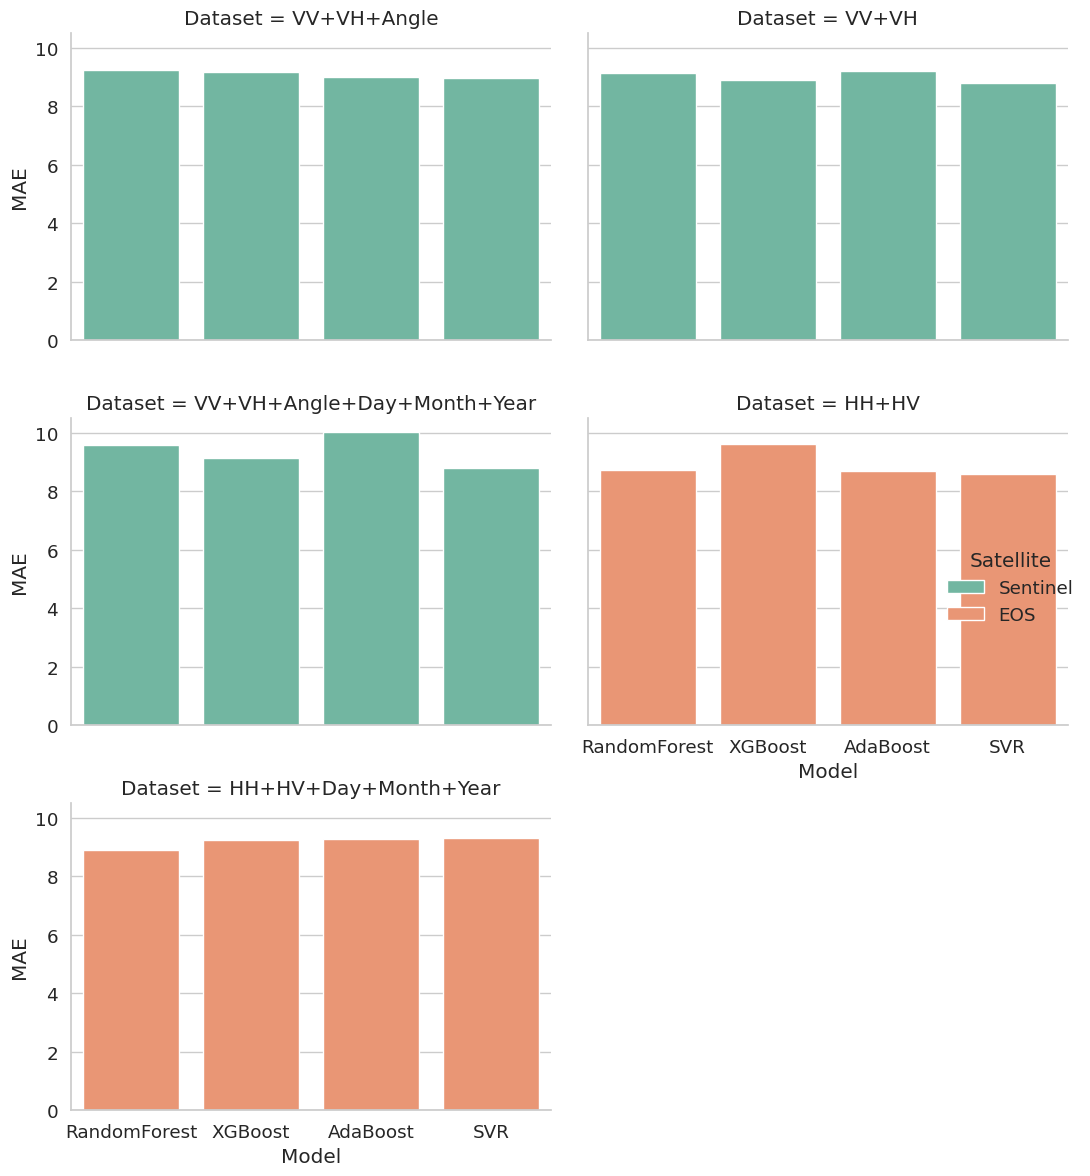

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Common styling
sns.set_theme(style="whitegrid", font_scale=1.2)

metric = "MAE"  # change to "MSE", "RMSE", "MAPE", "R2"

plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df,
    x="Model", 
    y=metric,
    hue="Satellite",
    errorbar=None,   # no error bars
    palette="Set2"
)

# Facet by Dataset (using col_wrap)
g = sns.catplot(
    data=df,
    x="Model", y=metric, hue="Satellite",
    col="Dataset", col_wrap=2,
    kind="bar", errorbar=None, palette="Set2",
    height=4, aspect=1.2
)

# g.set_titles("{col_name}")
# g.set_axis_labels("", metric)
# for ax in g.axes.flatten():
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=20)

plt.tight_layout()
plt.show()